#### Exploratory Data Analysis
Task 1 - Segmenting the dataset and drawing unique insights, also visulaization of Transaction volume and assessing the effects of any outliers.
Dataset - Synthesised transaction dataset containing 3 months worth of transaction,contains purchases, recurring trasactions and salary transactions.

#### Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the dataset

In [ ]:
data =  pd.read_csv('drive/MyDrive/Datasets/ANZ_synthesised_transaction.csv')
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,01-08-2018,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,01-08-2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,01-08-2018,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,01-08-2018,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,01-08-2018,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [ ]:
print(data.shape)
print(data.info())

(12043, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction

In [ ]:
data.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [ ]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


Question - Finding the average (mean) trasaction amount? 
          = From the above describe() function, obtained average of trasanction amount directly. ie.  187.93.  
          Or also we can use mean() function for finding average of amount.

In [ ]:
data['amount'].mean()

187.93358797641767

In [ ]:
data.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

From nunique() function, the columns which have 1 unique value for overall dataset, we can remove that columns, (thats unnecessary columns)
       Also, 'transaction id' columns is unecessary as they are unique for every rows in the dataset.
'bpay_biller_code' column has large number of null values, it is conveinint to neglet that column too.

In [ ]:
fdata = data.drop(['currency','merchant_code', 'country', 'transaction_id','bpay_biller_code'],axis = 1)
fdata.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'customer_id', 'merchant_long_lat', 'movement'],
      dtype='object')

#### Arranding the date columns into 3 months trasaction classes

In [ ]:
fdata['transaction_month'] = fdata['date'].str[3:]
fdata['transaction_month'].head()

0    08-2018
1    08-2018
2    08-2018
3    08-2018
4    08-2018
Name: transaction_month, dtype: object

In [ ]:
fdata['transaction_month'] = pd.to_datetime(fdata['transaction_month'],format= '%m-%Y')

In [ ]:
fdata['transaction_month'].nunique()

3

#### Data visulaization

Question - How many trasactions do customer make in each month on average?

transaction_month
2018-08-01    3943
2018-09-01    4013
2018-10-01    4087
Name: customer_id, dtype: int64


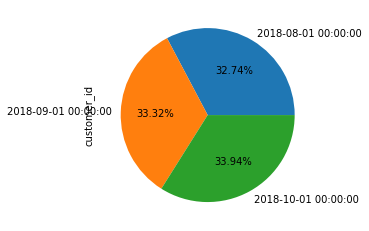

In [ ]:
#sns.catplot(x = 'transaction_month', kind = 'count', data = fdata, hue = 'customer_id')
transaction_month = fdata.groupby('transaction_month').customer_id.count()
print(transaction_month)
transaction_month.plot.pie(autopct = '%.2f%%')

Total Transaction done by customers in month wise basis is given above

In [ ]:
fdata.head()

,status,card_present_flag,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,merchant_long_lat,movement,transaction_month
0,authorized,1.0,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,01-08-2018,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,CUS-2487424745,153.38 -27.99,debit,2018-08-01
1,authorized,0.0,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,01-08-2018,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,CUS-2487424745,151.21 -33.87,debit,2018-08-01
2,authorized,1.0,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,01-08-2018,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,CUS-2142601169,151.21 -33.87,debit,2018-08-01
3,authorized,1.0,ACC-1037050564,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,01-08-2018,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,CUS-1614226872,153.05 -26.68,debit,2018-08-01
4,authorized,1.0,ACC-1598451071,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,01-08-2018,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,CUS-2487424745,153.44 -28.06,debit,2018-08-01


Age of Customers in distributed (histogram/bins) format

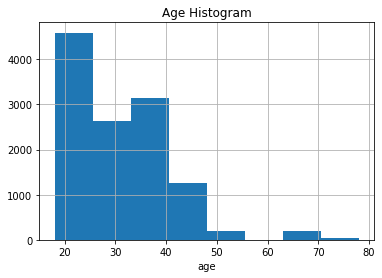

In [ ]:
fdata['age'].hist(bins = 8)
plt.xlabel('age')
plt.title('Age Histogram')
plt.show()

Mean Amount of transactions done by customers in each of the 3 months given in dataset

In [ ]:
fdata.groupby('transaction_month').amount.mean()

transaction_month
2018-08-01    185.121867
2018-09-01    182.045903
2018-10-01    196.427323
Name: amount, dtype: float64

Transaction Amount in distrubuted format, using boxenplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


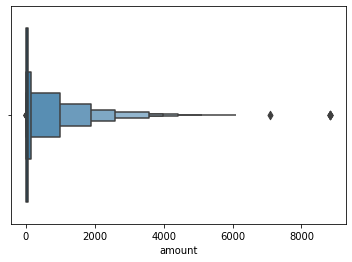

In [ ]:
sns.boxenplot(fdata['amount'])

Total trnasaction amount per month with respect to type of transaction (i.e debit and credit)

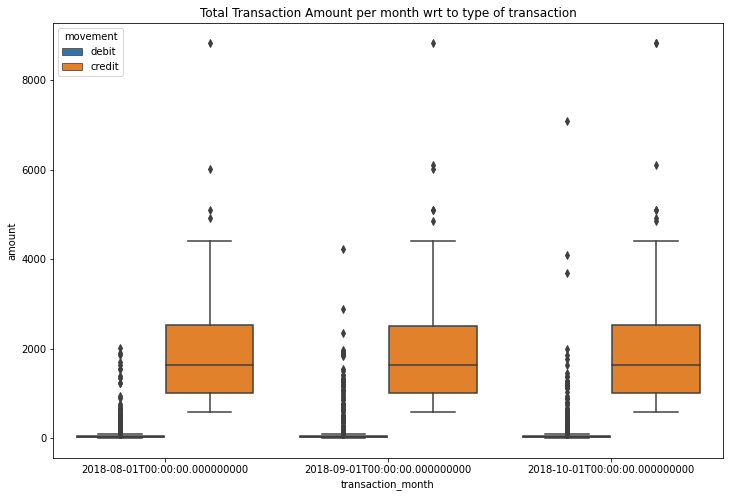

In [ ]:
plt.figure(figsize= (12, 8))
sns.boxplot(x = 'transaction_month', y = 'amount',data = fdata,hue = 'movement')
plt.title('Total Transaction Amount per month wrt to type of transaction')
plt.show()

Aveage/mean Transaction amount per state with respect to gender distribution (hue = gender)

<Figure size 1080x504 with 0 Axes>

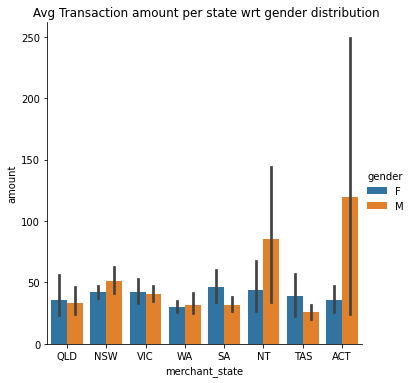

In [ ]:
plt.figure(figsize= (15, 7))
sns.catplot(x = 'merchant_state', y = 'amount', kind = 'bar', data =fdata, hue= 'gender')
plt.title(' Avg Transaction amount per state wrt gender distribution')
plt.show()

Top 10 customers - Having Maximum transaction amount range

In [ ]:
customers = pd.DataFrame(fdata.groupby(['customer_id','first_name']).amount.mean().sort_values(ascending = False))
top_10_customers = customers.iloc[0:10,:]
top_10_customers

,,amount
customer_id,first_name,
CUS-495599312,Jonathan,693.632903
CUS-2738291516,Kenneth,567.614500
CUS-1816693151,Tim,515.583846
CUS-55310383,Melissa,497.669474
CUS-3174332735,Cindy,489.220980
CUS-2819545904,Brian,448.658413
CUS-1739931018,Kimberly,426.108800
CUS-134833760,Billy,418.742468
CUS-3201519139,Richard,392.840811


In [ ]:
fdata.groupby('txn_description').txn_description.count()

txn_description
INTER BANK     742
PAY/SALARY     883
PAYMENT       2600
PHONE BANK     101
POS           3783
SALES-POS     3934
Name: txn_description, dtype: int64

Gender distribution in dataset

gender
F    5758
M    6285
Name: gender, dtype: int64


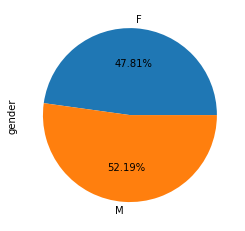

In [ ]:
gender = fdata.groupby('gender').gender.count()
print(gender)
gender.plot.pie(autopct = "%.2f%%")

Transaction Amount vs Balanace distribution of customers with respect to their genders

<Figure size 864x864 with 0 Axes>

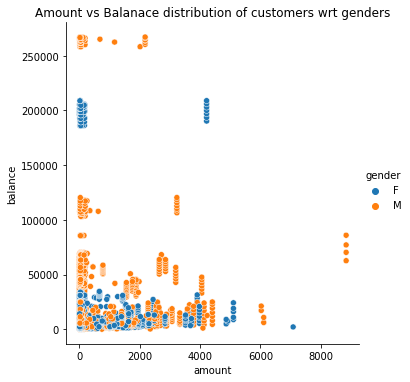

In [ ]:
plt.figure(figsize= (12,12))
sns.relplot(x = 'amount', y = 'balance', data = fdata, hue = 'gender')
plt.title('Amount vs Balanace distribution of customers wrt genders')
plt.show()

Transaction Amount distribution for whether card present or not, with hue = gender of customers

Text(0.5, 1.0, 'Transaction Amount distribution for whether card present or not')

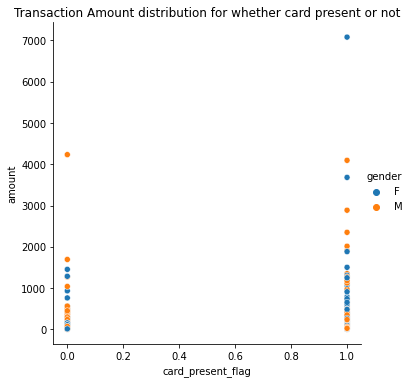

In [ ]:
sns.relplot(x = 'card_present_flag', y = 'amount', hue = 'gender', data = fdata)
plt.title('Transaction Amount distribution for whether card present or not')